In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("IRIS data.csv")
data.head()

### Data Analysis

In [3]:
data.shape

(150, 5)

In [4]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

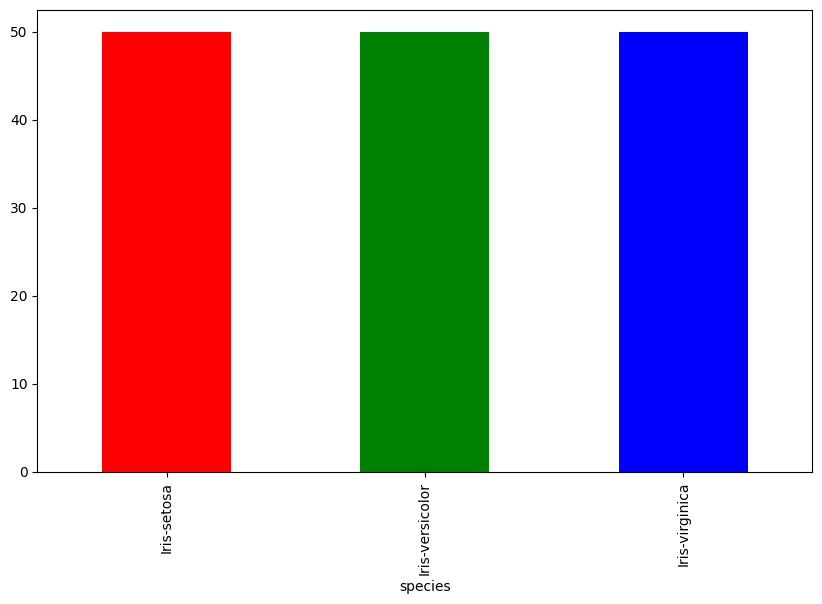

In [9]:
data["species"].value_counts().plot.bar(figsize=(10,6),color=["red","green","blue"])
plt.show()

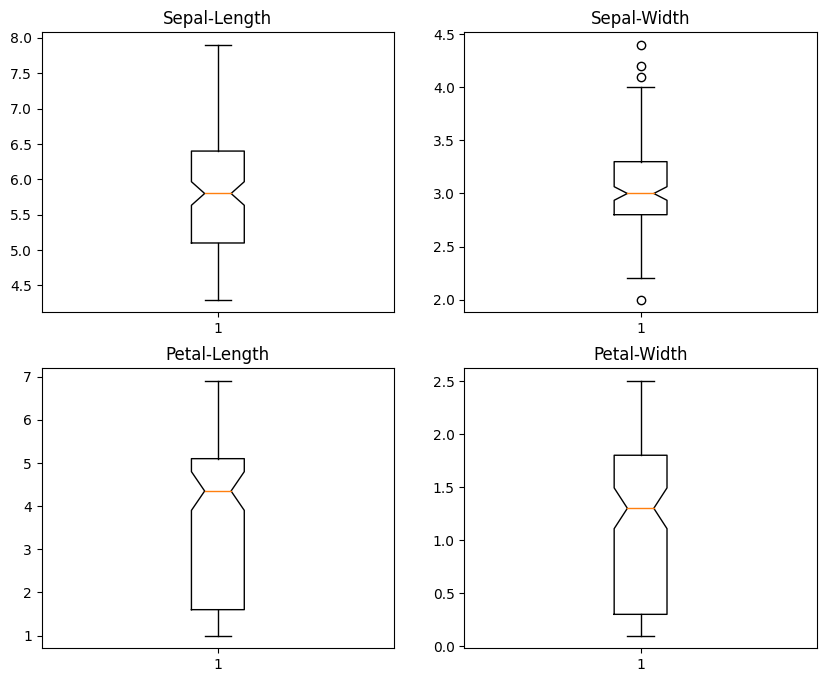

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.boxplot(x=data["sepal_length"],notch=True)
plt.title("Sepal-Length")
plt.subplot(2,2,2)
plt.boxplot(x=data["sepal_width"],notch=True)
plt.title("Sepal-Width")
plt.subplot(2,2,3)
plt.boxplot(x=data["petal_length"],notch=True)
plt.title("Petal-Length")
plt.subplot(2,2,4)
plt.boxplot(x=data["petal_width"],notch=True)
plt.title("Petal-Width")
plt.show()

<Figure size 1000x1000 with 0 Axes>

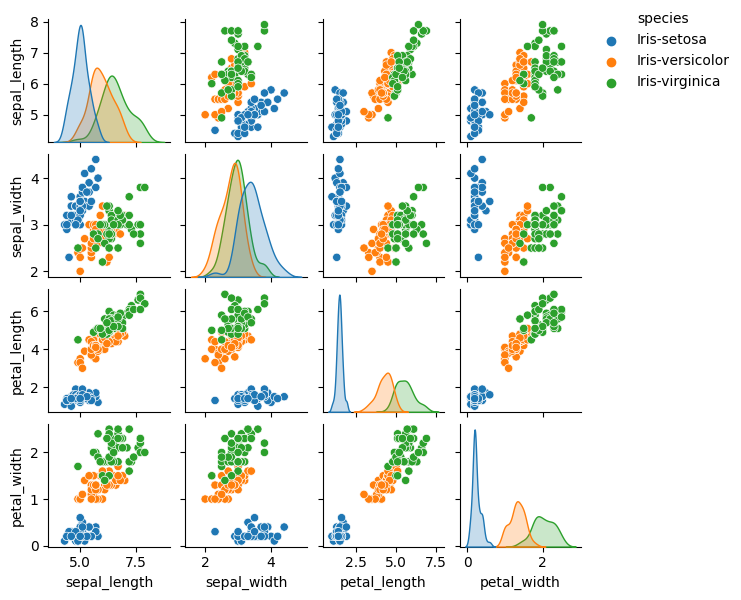

In [11]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

plt.figure(figsize=(10,10))
pairplot=sns.pairplot(data=data,hue="species",height=1.5)
sns.move_legend(pairplot,loc="upper right")
plt.show()

### Data Preprocessing

In [12]:
names=data["species"]
data['species']=data['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data['species'].unique()

array([0, 1, 2])

### Correlation Between the Data

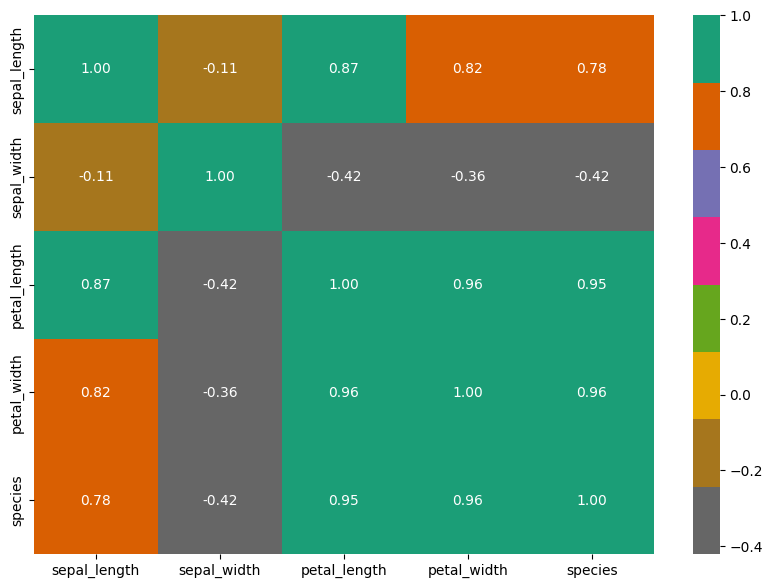

In [13]:
corrdata=data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrdata,annot=True,cbar=True,cmap='Dark2_r',fmt=".2f")
plt.show()

### Feature Engineering

In [14]:
features=data.drop("species",axis=1)
target=data['species']

### Mutual Information

<Axes: >

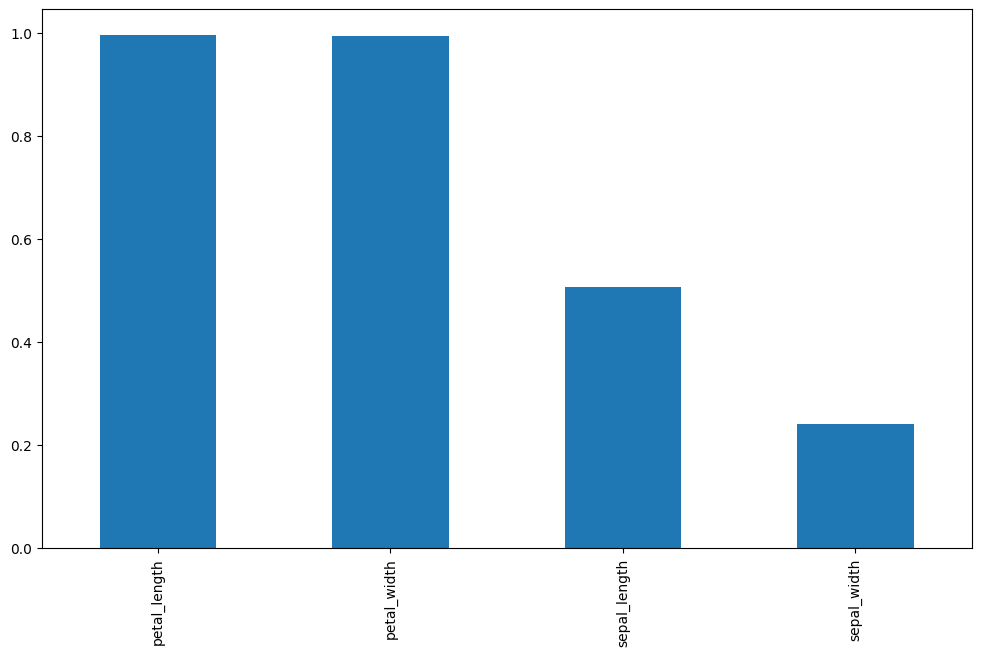

In [15]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(features,target)
mutual_info_values=pd.Series(mutual_info)
mutual_info_values.index=features.columns
mutual_info_values.sort_values(ascending=False).plot.bar(figsize=(12,7))


### Pearson Correlation

In [16]:
def correlation(dataset,threshhold):
    col=set()
    corr_matrix=features.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]>threshhold):
                col_name=corr_matrix.columns[i]
                col.add(col_name)
    return col
correlation(features,0.7)

{'petal_length', 'petal_width'}

In [17]:
features.drop('petal_length',axis=1,inplace=True)

In [18]:
features.drop('sepal_width',axis=1,inplace=True)

In [19]:
features.head()

,sepal_length,petal_width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


### Splitting the Data into Training and Testing

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)


### Training the Model

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

parameters={"criterion":['gini','entropy'],
            
            "max_depth":[1,2,3,4,5],
            "min_samples_split":[3,5,7,9],
            "max_features":["sqrt","log2"],
            "n_estimators":[20,40,60,80,100]}
model=RandomForestClassifier()
tuning=GridSearchCV(model,param_grid=parameters,cv=5,scoring='accuracy')
tuning.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [20, 40, 60, 80, 100]},
             scoring='accuracy')

In [22]:
tuning.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'min_samples_split': 7,
 'n_estimators': 80}

### Evaluating the Performance

In [23]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
train_pred=tuning.predict(x_train)
test_pred=tuning.predict(x_test)

### Accuracy

In [24]:
train_accuracy=accuracy_score(train_pred,y_train)
print("Training Accuracy- ",train_accuracy.round(2))

Training Accuracy-  0.94


In [25]:
test_accuracy=accuracy_score(test_pred,y_test)
print("Test Accuracy- ",test_accuracy.round(2))

Test Accuracy-  1.0


### Classification Report

In [26]:
report=classification_report(test_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Confusion Matrix

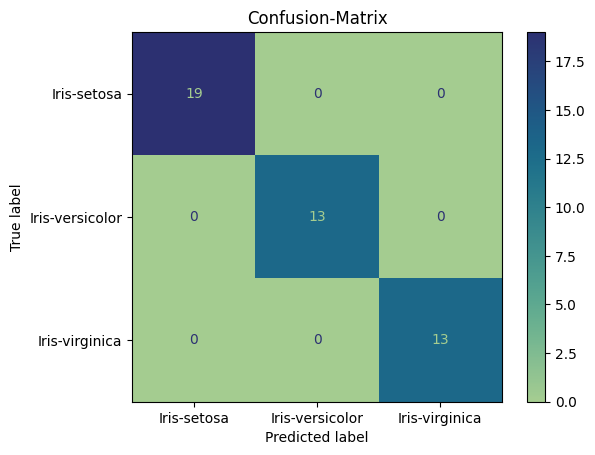

In [27]:
matrix=confusion_matrix(test_pred,y_test)
cm_matrix=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
cm_matrix.plot(cmap="crest")
plt.title("Confusion-Matrix")
plt.show()

### Testing the Prediction

In [28]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")
sepal_length=1.5
petal_width=0.7
new_data=[[sepal_length,petal_width]]
pred=tuning.predict(new_data)
if(pred[0]==0):
    print("Iris-setosa")
elif(pred[0]==1):
    print("Iris-versicolor")
else:
    print("Iris-virginca")

Iris-setosa
